# Algolrithm motion_model_odometry with Normal Distribution Noise

## Initial setting of mobile robot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
moves = [(4,0,0),(2,0,0),(2,0,0),(2,0,0),(0,2,np.pi/8),(0,2,np.pi/8),(0,2,np.pi/8),\
         (-2,0,np.pi/8),(-2,0,np.pi/8),(-2,0,np.pi/8),(-2,0,np.pi/8),(-2,0,np.pi/8)]

In [3]:
init_pos = np.array(moves[0])
init_pos.reshape((1,3))

points_data = np.tile(init_pos,(500,1))
params = (0.02, 0.02, 0.02, 0.02)

In [4]:
def get_new_points(original_pos, pos_delta, params, ideal_pos):
    trans = np.sqrt(pos_delta[0]**2 + pos_delta[1]**2)*np.ones(500)
    rot1 = np.arctan2(pos_delta[1], pos_delta[0])*np.ones(500) - ideal_pos[2]
    rot2 = pos_delta[2]*np.ones(500)-rot1
    alpha1, alpha2, alpha3, alpha4 = params
    # print(alpha1, alpha2, alpha3, alpha4)
    stdv1 = alpha1*np.abs(rot1) + alpha2*trans
    stdv2 = alpha3*trans + alpha4*(np.abs(rot1)+np.abs(rot2))
    stdv3 = alpha1*np.abs(rot2) + alpha2*trans
    rot1_tilta = rot1 + np.random.normal(scale=stdv1)
    trans_tilta = trans + np.random.normal(scale=stdv2)
    rot2_tilta = rot2 + np.random.normal(scale=stdv3)
    x_prime = original_pos[:,0] + trans_tilta*np.cos(original_pos[:,2]+rot1_tilta)
    y_prime = original_pos[:,1] + trans_tilta*np.sin(original_pos[:,2]+rot1_tilta)
    theta_prime = original_pos[:,2] + rot1_tilta + rot2_tilta
    ideal_pos += np.array(pos_delta, dtype=float)
    return np.stack((x_prime,y_prime,theta_prime), axis = 1), ideal_pos

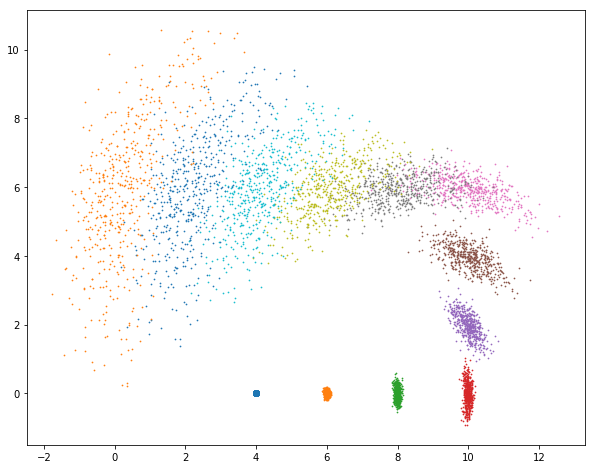

In [5]:
ideal_pos = np.array(moves[0], dtype=float)
plt.figure(figsize=(10,8))
original_pos = points_data
plt.scatter(original_pos[:,0], original_pos[:,1])
for move in moves[1:]:
    pos_delta = move
    original_pos, ideal_pos = get_new_points(original_pos, pos_delta, params, ideal_pos)
    # print(np.mean(original_pos[:,2]))
    plt.scatter(original_pos[:,0], original_pos[:,1], s=0.5)
plt.show()